# Imports

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

%matplotlib inline

# Constants

In [66]:
DATA_PATH = 'A_Z_Handwritten_Data.csv'
ALPHABETS = {
    0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I',9:'J',
    10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S',
    19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24: 'Y', 25:'Z'
}

# Importing the Data

In [67]:
%%time

dataset = pd.read_csv(DATA_PATH)

CPU times: user 16.3 s, sys: 4.1 s, total: 20.4 s
Wall time: 20.7 s


In [68]:
dataset.shape

(372450, 785)

In [69]:
dataset.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dataset.rename(columns={'0':'label'}, inplace=True)

# Split data X-Our data, Y-Predict Labels
X = dataset.drop('label', axis=1)
y = dataset['label']

In [71]:
X.shape

(372450, 784)

In [72]:
y.shape

(372450,)

# Data Insights

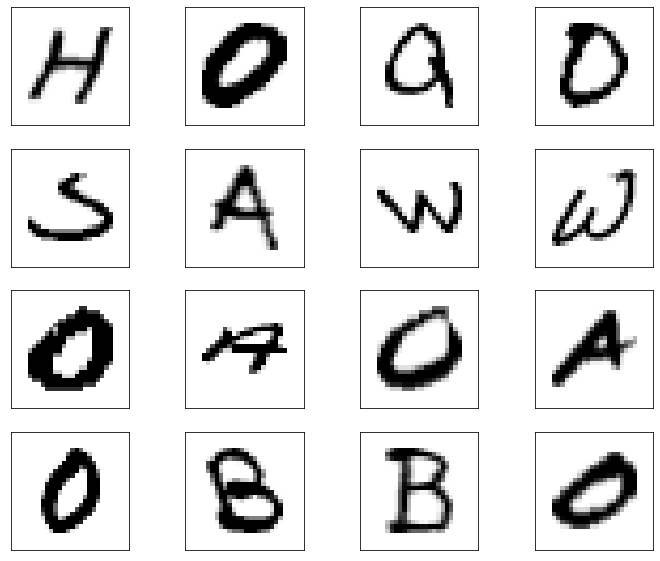

In [73]:
X_shuffle = shuffle(X)

plt.figure(figsize=(12,10))
row, columns = 4,4
for i in range(16):
    plt.subplot(columns, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28), interpolation='nearest', cmap='Greys')
    plt.xticks([]), plt.yticks([])
plt.show()    

### Amount of each labels in our dataset

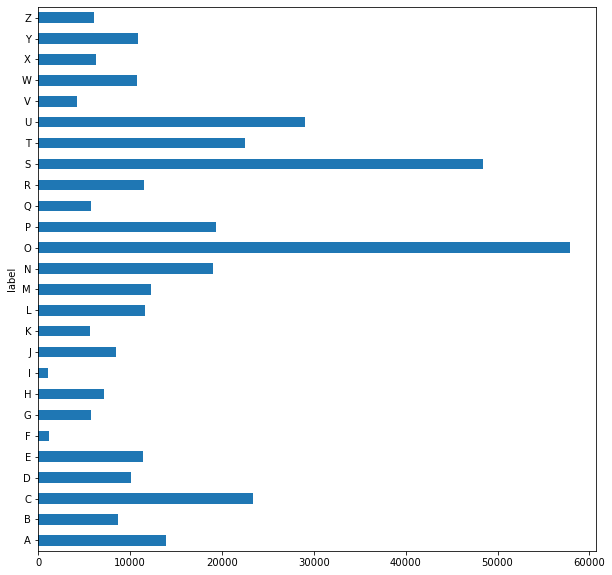

In [74]:
# making a copy of original dataset and mapping alphabets on features values(labels)
dataset_alphabets = dataset.copy()
dataset['label'] = dataset['label'].map(ALPHABETS)

label_size = dataset.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [75]:
print('We have very low observations for I and F')
print(f"I count: {label_size['I']}")
print(f"F count: {label_size['F']}")

We have very low observations for I and F
I count: 1120
F count: 1163


# Data Preparation

In [76]:
# Split the Data into ratio 7:3
(X_train, X_test, y_train, y_test) = train_test_split(X,y, test_size=0.3, random_state=2)

In [77]:
X_test.shape

(111735, 784)

In [78]:
X_train.shape

(260715, 784)

In [79]:
type(X_train)

pandas.core.frame.DataFrame

In [87]:
type(y_train)

pandas.core.series.Series

In [86]:
type(y_test)

pandas.core.series.Series

### Saving training and testing data into csv

In [81]:
#X_test.to_csv('alphabets_xtest.csv')

In [83]:
#y_test.to_csv('alphabets_ytest.csv')

In [84]:
#X_train.to_csv('alphabets_xtrain.csv')

In [88]:
#y_train.to_csv('alphabets_ytrain.csv')

In [60]:
# Convert from dataframe to numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

#### Reshape the Data and change it into float32 as usual


In [61]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [62]:
# The pixel of data is comprised from 0 to 255.
# Now normalize the data from 0 to 1.
X_train = X_train / 255
X_test = X_test / 255

In [63]:
# One-Hot Encoding of the target
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

#Define the classification of 26 alphabets.
num_classes = Y_test.shape[1]

In [64]:
num_classes

26